In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from math import *
from matplotlib.colors import Normalize

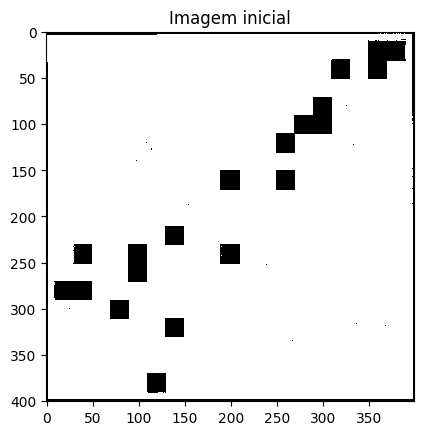

In [25]:
pgmf = open('my_map.pgm', 'rb')
image = plt.imread(pgmf)

image_copia = 1.0 * (image > 250)

goal = (300, 25) 
robo = (80, 325) 

image_copia[goal[0]][goal[1]] = 0 
image_copia[robo[0]][robo[1]] = 0   

fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 1')

plt.imshow(image_copia, interpolation='nearest', cmap='gray')
plt.title('Imagem inicial')
plt.show()

In [26]:
ponto = (200,180)
dist = math.dist(robo, ponto)
dist2 = math.dist(ponto, goal)
dist3 = dist + dist2
print(dist)
print(dist2)
print(dist3)

188.2153022471871
184.45866745696716
372.6739697041543


In [27]:
def indice_menor_valor(lista_f, lista_c):
    if not lista_f or not lista_c :
        return None
    
    lista_f = np.array(lista_f)
    lista_c = np.array(lista_c)

    lista_ind = np.where(lista_f == min(lista_f))
    lista_ind = lista_ind[0]

    h_min = math.dist(lista_c[lista_ind[0]], goal)

    menor_indice = lista_ind[0]

    for i in lista_ind:
        h = math.dist(lista_c[i], goal)
        if (h < h_min):
            h_min = h
            menor_indice = i

    return menor_indice


#tentativa 1
image_copia[goal[0]][goal[1]] = 2 #objetivo é 2
image_copia[robo[0]][robo[1]] = 1 #robo é 1

menor_h = 1000
ponto = robo
parar = False
coordenadas = list()
caminho_f = list ()

while(1):
    for l in range (-1,2):
        for c in range (-1,2):
            try:
                if(image_copia[ponto[0]+l][ponto[1]+c] == 1):
                    g = math.dist(robo, (ponto[0]+l,ponto[1]+c))
                    h = math.dist((ponto[0]+l,ponto[1]+c), goal)
                    f = g + h

                    image_copia[ponto[0]+ l][ponto[1]+c]= f
                    caminho_f.append(f)
                    coordenadas.append([ponto[0]+ l, ponto[1]+c])

                if(ponto[0]+l == goal[0] and ponto[1]+c == goal[1]):
                    print("deu que chegou ")
                    parar = True
                    break
            except: 
                continue
        if(parar == True):
            break   
    if(parar == True):
           break   
    
    menor_ind = indice_menor_valor(caminho_f, coordenadas)
    ponto = coordenadas.pop(menor_ind)
    caminho_f.pop(menor_ind)

    print("novo ponto: ", ponto)





novo ponto:  [80, 325]
novo ponto:  [81, 324]
novo ponto:  [81, 323]
novo ponto:  [82, 322]
novo ponto:  [83, 321]
novo ponto:  [84, 320]
novo ponto:  [84, 319]
novo ponto:  [85, 318]
novo ponto:  [86, 317]
novo ponto:  [87, 316]
novo ponto:  [87, 315]
novo ponto:  [88, 314]
novo ponto:  [89, 313]
novo ponto:  [90, 312]
novo ponto:  [90, 311]
novo ponto:  [91, 310]
novo ponto:  [89, 312]
novo ponto:  [91, 311]
novo ponto:  [86, 316]
novo ponto:  [88, 315]
novo ponto:  [88, 313]
novo ponto:  [85, 319]
novo ponto:  [92, 310]
novo ponto:  [90, 310]
novo ponto:  [89, 314]
novo ponto:  [83, 320]
novo ponto:  [85, 317]
novo ponto:  [86, 318]
novo ponto:  [87, 314]
novo ponto:  [90, 313]
novo ponto:  [89, 311]
novo ponto:  [82, 323]
novo ponto:  [87, 317]
novo ponto:  [91, 312]
novo ponto:  [83, 322]
novo ponto:  [86, 315]
novo ponto:  [88, 312]
novo ponto:  [84, 318]
novo ponto:  [88, 316]
novo ponto:  [92, 311]
novo ponto:  [82, 321]
novo ponto:  [84, 321]
novo ponto:  [93, 310]
novo ponto:

In [28]:
#teste de como faz pra i ter o valor do indice e não da variavel em si
for i in range(len(coordenadas)):
    print(coordenadas[i]) 

[79, 327]
[77, 325]
[78, 327]
[86, 327]
[77, 326]
[80, 328]
[81, 328]
[82, 328]
[83, 328]
[89, 326]
[94, 323]
[87, 327]
[77, 314]
[91, 325]
[84, 328]
[100, 319]
[93, 324]
[96, 322]
[76, 320]
[76, 321]
[76, 322]
[77, 313]
[76, 319]
[79, 328]
[76, 323]
[104, 316]
[99, 320]
[76, 318]
[110, 311]
[103, 317]
[95, 323]
[85, 328]
[90, 326]
[109, 312]
[77, 312]
[76, 324]
[88, 327]
[98, 321]
[76, 317]
[108, 313]
[102, 318]
[92, 325]
[107, 314]
[101, 319]
[106, 315]
[76, 316]
[97, 322]
[94, 324]
[77, 311]
[105, 316]
[100, 320]
[111, 311]
[86, 328]
[76, 315]
[104, 317]
[110, 312]
[76, 325]
[109, 313]
[96, 323]
[77, 310]
[91, 326]
[103, 318]
[99, 321]
[89, 327]
[108, 314]
[77, 327]
[76, 314]
[93, 325]
[107, 315]
[102, 319]
[98, 322]
[106, 316]
[112, 310]
[112, 311]
[113, 308]
[113, 309]
[113, 310]
[113, 307]
[113, 306]
[113, 305]
[113, 304]
[113, 303]
[119, 296]
[120, 295]
[121, 294]
[122, 293]
[131, 283]
[123, 292]
[132, 282]
[124, 291]
[139, 274]
[150, 261]
[145, 267]
[120, 239]
[133, 281]
[225, 

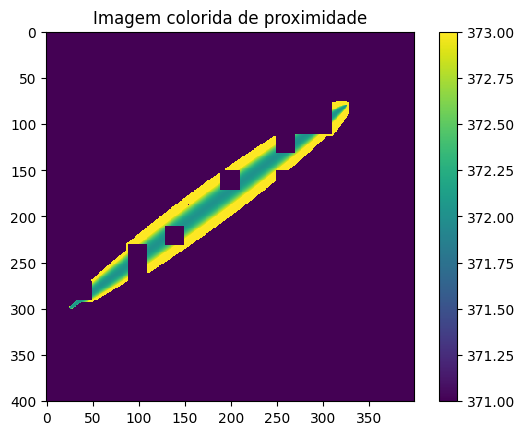

In [29]:
fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 2')

norm = Normalize(vmin=371, vmax=373)
cmap= plt.get_cmap('viridis')

plt.imshow(image_copia, interpolation='nearest', cmap='viridis', norm=norm)  # Usando viridis para ver os valores
plt.colorbar()
plt.title('Imagem colorida de proximidade')
plt.show()

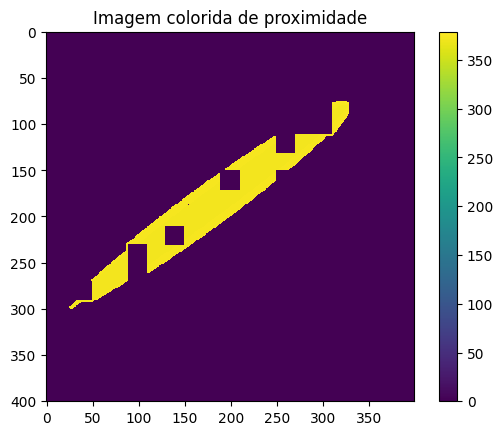

In [30]:
fig = plt.figure()
fig.canvas.manager.set_window_title('Figura 2')

plt.imshow(image_copia, interpolation='nearest', cmap='viridis')  # Usando viridis para ver os valores
plt.colorbar()
plt.title('Imagem colorida de proximidade')
plt.show()

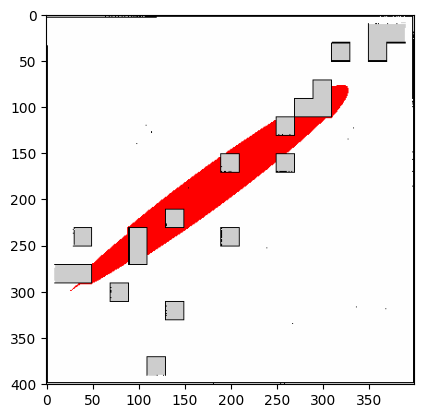

In [31]:
#colorindo o caminho :)

image_com_caminho = image.copy()
image_com_caminho = cv2.cvtColor(image_com_caminho, cv2.COLOR_GRAY2RGB)

for i in caminho_p:

    image_com_caminho[i[0]][i[1]] = [254, 0, 0]

plt.imshow(image_com_caminho)


In [32]:
print(coordenadas)
print(caminho_f)

[[79, 327], [77, 325], [78, 327], [86, 327], [77, 326], [80, 328], [81, 328], [82, 328], [83, 328], [89, 326], [94, 323], [87, 327], [77, 314], [91, 325], [84, 328], [100, 319], [93, 324], [96, 322], [76, 320], [76, 321], [76, 322], [77, 313], [76, 319], [79, 328], [76, 323], [104, 316], [99, 320], [76, 318], [110, 311], [103, 317], [95, 323], [85, 328], [90, 326], [109, 312], [77, 312], [76, 324], [88, 327], [98, 321], [76, 317], [108, 313], [102, 318], [92, 325], [107, 314], [101, 319], [106, 315], [76, 316], [97, 322], [94, 324], [77, 311], [105, 316], [100, 320], [111, 311], [86, 328], [76, 315], [104, 317], [110, 312], [76, 325], [109, 313], [96, 323], [77, 310], [91, 326], [103, 318], [99, 321], [89, 327], [108, 314], [77, 327], [76, 314], [93, 325], [107, 315], [102, 319], [98, 322], [106, 316], [112, 310], [112, 311], [113, 308], [113, 309], [113, 310], [113, 307], [113, 306], [113, 305], [113, 304], [113, 303], [119, 296], [120, 295], [121, 294], [122, 293], [131, 283], [123, 